<a href="https://colab.research.google.com/github/narayansethi03/MachineLearning/blob/main/Heart_Disease_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
heart_disease=pd.read_csv('heart-disease.csv')

In [ ]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
#set random seed 
np.random.seed(42)
#prepare the data 
x=heart_disease.drop('target',axis=1)
y=heart_disease['target']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
#instatiate the model
clf=RandomForestClassifier(n_estimators=250)
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.8688524590163934

In [ ]:
#predicting the target value
y_preds=clf.predict(x_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
#predicting using the 'Predict_proba()'
clf.predict_proba(x_train)[:10]

array([[0.016, 0.984],
       [0.86 , 0.14 ],
       [0.796, 0.204],
       [0.036, 0.964],
       [0.948, 0.052],
       [0.28 , 0.72 ],
       [0.132, 0.868],
       [0.04 , 0.96 ],
       [0.68 , 0.32 ],
       [0.076, 0.924]])

#Using Cross Validation Score method for evaluating the model

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
evaluation1 = cross_val_score (clf,x,y, cv=10) #by defualt the cv (number of sets in which data is spltited) is 5
evaluation1

array([0.90322581, 0.83870968, 0.87096774, 0.9       , 0.86666667,
       0.76666667, 0.73333333, 0.83333333, 0.73333333, 0.83333333])

In [ ]:
evaluation1.mean()

0.8279569892473118

**Utilizing the ROC Curve**

In [ ]:
#takes only 1's column and determines TPR and FPR from that column 
# we need to use predict_proba() for getting the 1's column from the data

In [ ]:
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
clf=RandomForestClassifier()
clf.fit(x_train,y_train)
eval=cross_val_score(clf,x,y,cv=5)
eval.mean()
print(f'The accuracy of the heart diesease model is : {eval.mean()*100:.2f}')

The accuracy of the heart diesease model is : 81.16


In [ ]:
#Using the ROC Curve now

In [ ]:
from sklearn.metrics import roc_curve
y_probs = clf.predict_proba(x_test)
y_probs[:10], len(y_probs)

(array([[0.89, 0.11],
        [0.49, 0.51],
        [0.43, 0.57],
        [0.84, 0.16],
        [0.18, 0.82],
        [0.14, 0.86],
        [0.36, 0.64],
        [0.95, 0.05],
        [0.99, 0.01],
        [0.47, 0.53]]), 61)

In [ ]:
#we only need the column - 1 for the roc curve since it gives us the difference between true positive rate and false positive rate

In [ ]:
y_probs_1s=y_probs[:,1]
for i in y_probs_1s:
  print (i)

0.11
0.51
0.57
0.16
0.82
0.86
0.64
0.05
0.01
0.53
0.74
0.3
0.89
0.05
0.97
0.98
0.99
0.16
0.05
0.02
0.49
0.11
0.62
0.71
0.74
0.66
0.8
0.78
0.17
0.85
0.06
0.08
0.04
0.38
0.54
0.11
0.56
0.84
0.67
0.92
0.87
0.83
0.82
0.62
0.68
0.23
0.61
1.0
0.17
0.03
0.15
0.2
0.75
0.75
0.13
0.07
0.29
0.99
0.13
0.0
0.14


In [ ]:
#calculate the FPR, TPR and threshold
fpr,tpr,threshold=roc_curve(y_test,y_probs_1s,)
tpr

array([0.     , 0.03125, 0.09375, 0.375  , 0.4375 , 0.4375 , 0.46875,
       0.59375, 0.6875 , 0.6875 , 0.71875, 0.75   , 0.75   , 0.875  ,
       0.875  , 0.96875, 0.96875, 0.96875, 0.96875, 0.96875, 0.96875,
       0.96875, 1.     , 1.     , 1.     ])

In [ ]:
#Plotting an Receive Operating Characterstic curve

In [ ]:
import matplotlib.pyplot as plt
def plot_roc (fpr,tpr):
  plt.style.use("seaborn-whitegrid")
  plt.plot(fpr,tpr,color='blue')
  plt.xlabel('False Postive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Reciever Operatng Characterstic Curve')
  plt.show()

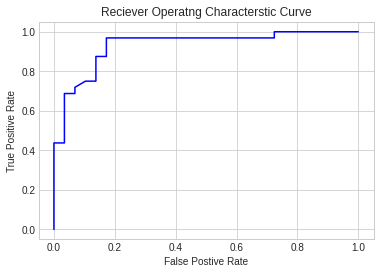

In [ ]:
plot_roc(fpr,tpr);

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_probs_1s)

0.9304956896551724

**Creating Confusion Martrix**

A confusion matrix is nothing but a comparison between the actual test results vs the predicted test results.

It is a square matrix that represents the (0,0)(0,1)(1,1)(1,0)values. See it in action below.

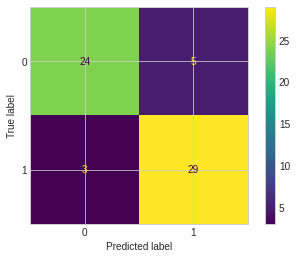

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import seaborn as sns
c_matrix=confusion_matrix(y_test,y_preds)
c_matrix_plot=ConfusionMatrixDisplay(confusion_matrix=c_matrix)
c_matrix_plot.plot() 
plt.show();